<a href="https://colab.research.google.com/github/jamissonfreitas/IN1167/blob/master/Cap3e4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# lib to plot the data
import matplotlib.pyplot as plt
# lib to import the stocastic basic models
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
# lib to import the ar model
from statsmodels.tsa.ar_model import AR
import requests
import pandas as pd

## Load database

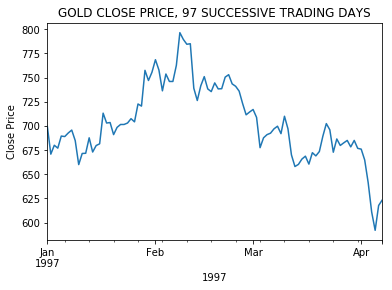

In [7]:
url='https://raw.githubusercontent.com/FinYang/tsdl/master/data-raw/commod/gold.dat'
s = requests.get(url).content
data = ' '.join([l.strip() for l in s.decode('utf-8').split('\n')[1:]])

serie = pd.Series(
    data.split(' '),
    index=pd.date_range(start ='1-1-1997', end ='4-7-1997', freq ='D')
) 
serie = serie.astype(float)

plt.xlabel('1997')
plt.ylabel('Close Price')
plt.title('GOLD CLOSE PRICE, 97 SUCCESSIVE TRADING DAYS')
serie.plot()

## Simple Exponential

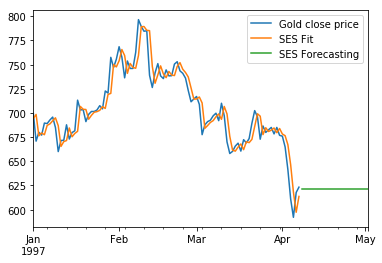

In [9]:
# fit the data
ses = SimpleExpSmoothing(serie).fit(smoothing_level=0.8, optimized=True)

# plot the data
serie.plot(label='Gold close price')
ses.fittedvalues.plot(label='SES Fit')
ses.forecast(25).rename('SES Forecasting').plot()

# to show the plot
plt.legend()
plt.show()

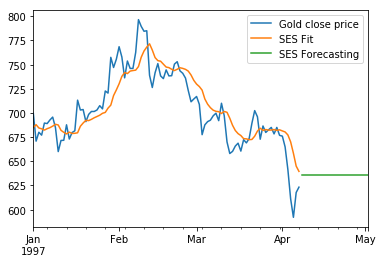

In [10]:
# fit the data
ses = SimpleExpSmoothing(serie).fit(smoothing_level=0.2, optimized=True)

# plot the data
serie.plot(label='Gold close price')
ses.fittedvalues.plot(label='SES Fit')
ses.forecast(25).rename('SES Forecasting').plot()

# to show the plot
plt.legend()
plt.show()

## Holt and Winter

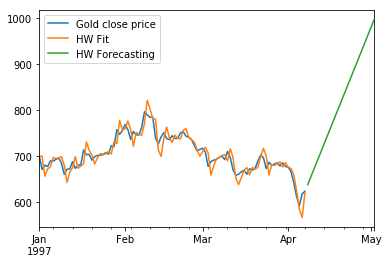

In [11]:
# fit the data
hw = Holt(serie).fit(smoothing_level=0.8, smoothing_slope=0.9)

# original serie
serie.plot(label='Gold close price')

# plot the data
hw.fittedvalues.plot(label='HW Fit')

# to show the plot
hw.forecast(25).rename('HW Forecasting').plot()
plt.legend()
plt.show()

## Exponential Smoothing

### seasonal periods = *30*

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


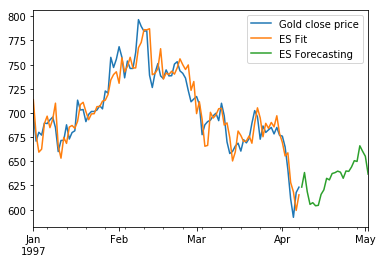

In [15]:
# fit the data
es = ExponentialSmoothing(serie, 
                          seasonal_periods=30, 
                          trend='add', 
                          seasonal='add', 
                          damped=True).fit(use_boxcox=True)

# plot the data
serie.plot(label='Gold close price')
es.fittedvalues.plot(label='ES Fit')
es.forecast(25).rename('ES Forecasting').plot()

# to show the plot
plt.legend()
plt.show()

### seasonal periods = 7

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


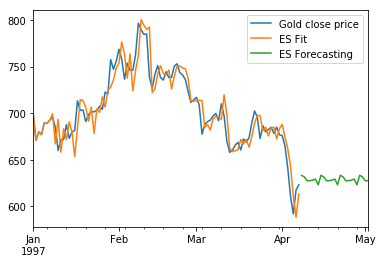

In [20]:
# fit the data
es = ExponentialSmoothing(serie, 
                          seasonal_periods=7, 
                          trend='add', 
                          seasonal='add', 
                          damped=True).fit(use_boxcox=True)

# plot the data
serie.plot(label='Gold close price')
es.fittedvalues.plot(label='ES Fit')
es.forecast(25).rename('ES Forecasting').plot()

# to show the plot
plt.legend()
plt.show()

## Auto Regressive

lags used:  12
parameters:  const    22.737310
L1.y      1.062563
L2.y     -0.138341
L3.y     -0.015329
L4.y      0.098148
L5.y     -0.184442
L6.y      0.178730
L7.y     -0.011502
L8.y     -0.049708
L9.y     -0.045324
L10.y     0.339283
L11.y    -0.303868
L12.y     0.036691
dtype: float64


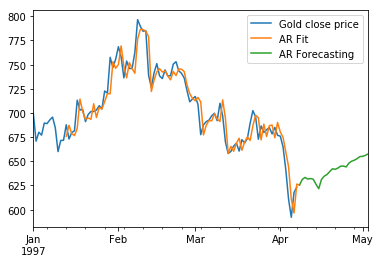

In [21]:
# train AR
model = AR(serie)
model_fitted = model.fit()

# parameters used
print("lags used: ", model_fitted.k_ar)
print("parameters: ", model_fitted.params)

# plot the prediction
serie.plot(label='Gold close price')
predictions = model_fitted.predict(start=model_fitted.k_ar, end=len(serie), dynamic=False)
predictions.plot(label='AR Fit')
predictions = model_fitted.predict(start=len(serie), end=len(serie)+25, dynamic=False)
predictions.plot(label='AR Forecasting')

#to show
plt.legend()
plt.show()